# Ablone case Study

### Description

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age

#### let's start with importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn. preprocessing import MinMaxScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# importing dataset
dataset=pd.read_csv('AbaloneCaseStudy.csv')

### Data Analysis

In [3]:
# displaying the first 5 row in our dataset dataframe
dataset.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


let's first compute the target variable of the problem 'Age' and assign it to the dataset. Age=1.5+Rings

In [4]:
#droping Rings column and adding age column of the abalone
dataset['age']=dataset['Rings']+1.5
dataset.drop('Rings',axis=1,inplace=True)

In [5]:
# display the shape of the dataset
print(dataset.shape)

(4177, 9)


In [6]:
# display the datatype of each attribute
dataset.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [7]:
# checking whether we have null or empty data in our dataset
print(dataset.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64


we don't have null or empty cells in our dataset so no need to apply imputer library to handle Empty Cell or empty values

In [8]:
# descriptive Statitistic describe each attribute
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Output attribute age confidence interval range starts from 9 to 12 so it is not starting from zero so it will positive skew

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

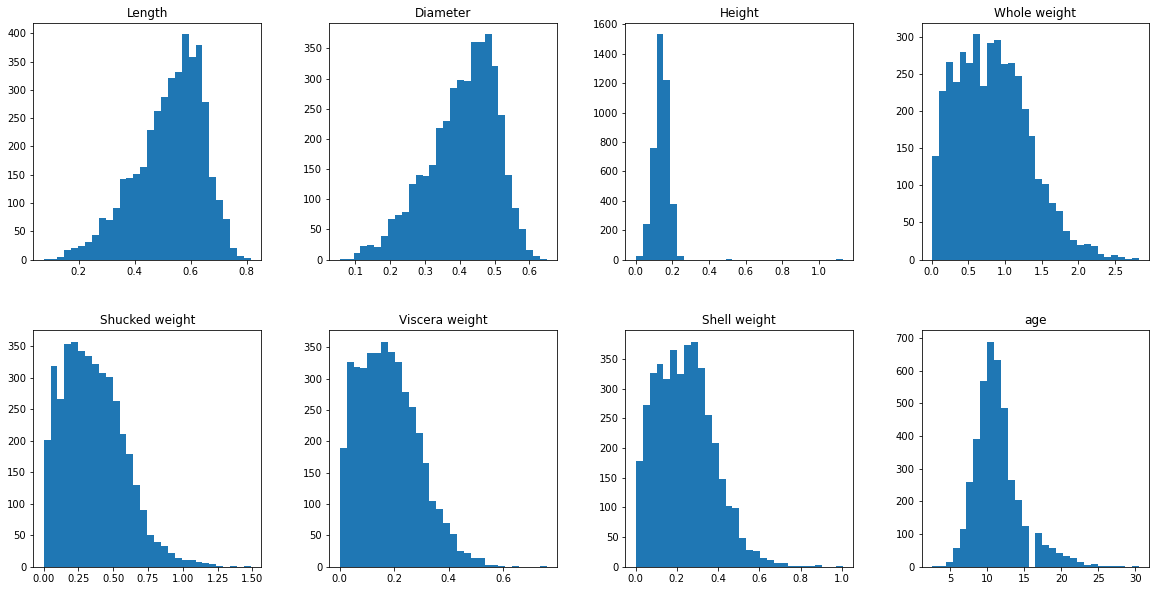

In [9]:
# histrogram visualisation for each attribute to know about what kind of distribution it is?
dataset.hist(figsize=(20,10),grid=False, layout=(2,4),bins=30)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

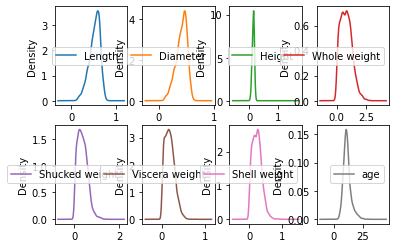

In [10]:
# density visualisation for all attributes
dataset.plot(kind='density',layout=(2,4), sharex=False, sharey=False,subplots=True, grid=False)

though features are not normaly distributed, are close to normality

/home/nik/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

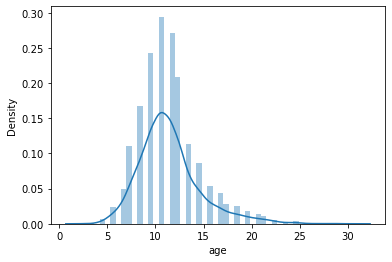

In [11]:
# histogram descriptive visualisation distribution for output attribute age 
sb.distplot(dataset['age'])

as per above plot we got normal distribution for discreate output age column values

### Analyzing the correlations with output and each input attribute and find outliers.

<AxesSubplot:xlabel='Length', ylabel='age'>

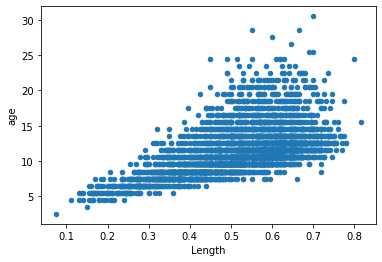

In [12]:
# histogram visualisation for age output and Longest shell measuruement input attributes

data_plot=pd.concat([dataset['age'],dataset['Length']],axis=1)
data_plot.plot.scatter(x='Length',y='age')

We don't have any outliers for age output and length input attributes as per above visualisation plot.

<AxesSubplot:xlabel='Diameter', ylabel='age'>

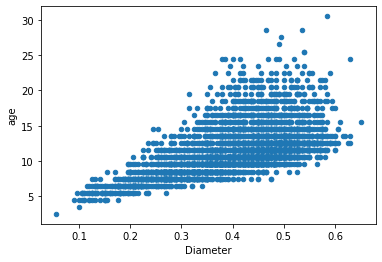

In [13]:
# histrogram visualisation for age output and diameter input attributes.

data_plot=pd.concat([dataset['Diameter'],dataset['age']],axis=1)
data_plot.plot.scatter(x='Diameter',y='age')

we don't have any outliers for age output and Diameter input attributes as per above visulisation plot.

<AxesSubplot:xlabel='Height', ylabel='age'>

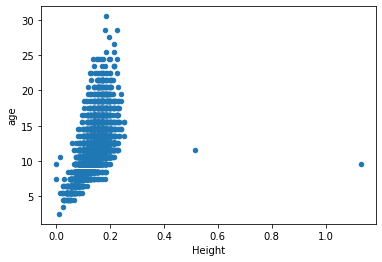

In [14]:
# Histogram visualisation for age output and height input attributes.
data_plot=pd.concat([dataset['Height'],dataset['age']],axis=1)
data_plot.plot.scatter(x='Height',y='age')

Here we got 2 outlier point in between 0.4 to 1.2 values. Perhaps with this outlier value will effect the performance for our algorithm.
so now we are going to remove this 2 outliers values.

### Removing outlier for age output and Height input attributes

<AxesSubplot:xlabel='Height', ylabel='age'>

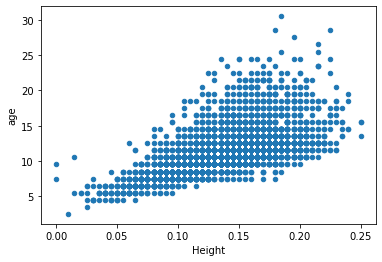

In [15]:
# Removing the outliers values from our dataset

dataset=dataset.drop(dataset[(dataset['Height']>0.4) & (dataset['Height']<1.4)].index)

# Visualising again to know those outlier removed or not
data_plot=pd.concat([dataset['Height'],dataset['age']],axis=1)
data_plot.plot.scatter(x='Height',y='age')

<AxesSubplot:xlabel='Whole weight', ylabel='age'>

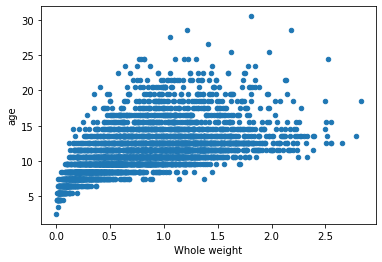

In [16]:
# histogram visualisation for age output and whole weight input attributes.

data=pd.concat([dataset['Whole weight'],dataset['age']],axis=1)
data.plot.scatter(x='Whole weight',y='age')

we didn't got any outliers for rings output and whole weight attributes. So we going further to check.

<AxesSubplot:xlabel='Shucked weight', ylabel='age'>

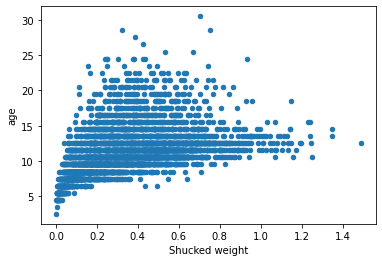

In [17]:
#Histogram visualisation for age output and shucked weight input attributes.

data=pd.concat([dataset['Shucked weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shucked weight',y='age')

As we can see above plot with high value we got less rings, so it was near to outlier so we are removing from 1.2 to 1.6 range values for rings output and shucked weight input attribute.

<AxesSubplot:xlabel='Shucked weight', ylabel='age'>

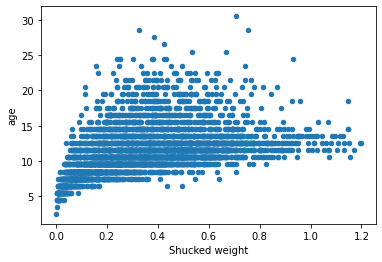

In [18]:
# removing the outlier values for age output and shucked weight input attribute.

dataset=dataset.drop(dataset[(dataset['Shucked weight']>1.2)&(dataset['Shucked weight']<1.5)].index)
# visualising again to know whether those outlier values removed or not

data=pd.concat([dataset['Shucked weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shucked weight',y='age')

<AxesSubplot:xlabel='Viscera weight', ylabel='age'>

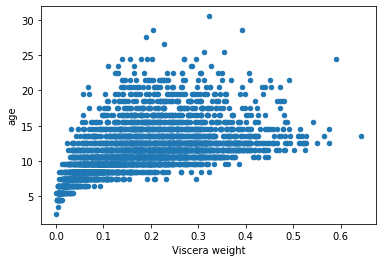

In [19]:
# histogram visualisation for viscera weight input attribute and age output attribute.
data=pd.concat([dataset['Viscera weight'],dataset['age']],axis=1)
data.plot.scatter(x='Viscera weight',y='age')

We got again 1 outlier value for viscera weight input attribute and age output attribute. So now we are going to remove in between 0.6 to 15 value box

<AxesSubplot:xlabel='Viscera weight', ylabel='age'>

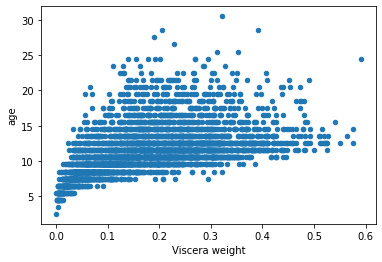

In [20]:
# removing the outlier value lies in between 0.6 to 15

dataset=dataset.drop(dataset[(dataset['Viscera weight']>0.6)&(dataset['Viscera weight']<15)].index)

# visualising again to check whether those outliers removed or not

data=pd.concat([dataset['Viscera weight'],dataset['age']],axis=1)
data.plot.scatter(x='Viscera weight',y='age')

<AxesSubplot:xlabel='Shell weight', ylabel='age'>

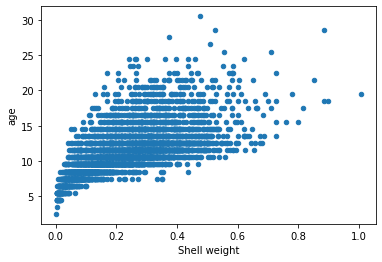

In [21]:
# histogram visualisation for shell weight input attribute and age output attribute.

data=pd.concat([dataset['Shell weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shell weight',y='age')

We are not sure whether those values lies below the threshold 0.9 to 15 values we are going to remove those values.

<AxesSubplot:xlabel='Shell weight', ylabel='age'>

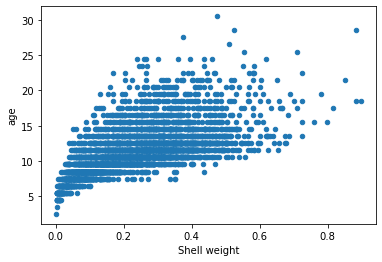

In [22]:
# Removing the outliers for shell weight input attribute and age output attribute.

dataset=dataset.drop(dataset[(dataset['Shell weight']>0.9)&(dataset['Shell weight']<15)].index)

# visualising again to check all outlier below the threshold removed or not.
data=pd.concat([dataset['Shell weight'],dataset['age']],axis=1)
data.plot.scatter(x='Shell weight',y='age')

### Correlation values between each attributes using heatmap

<AxesSubplot:>

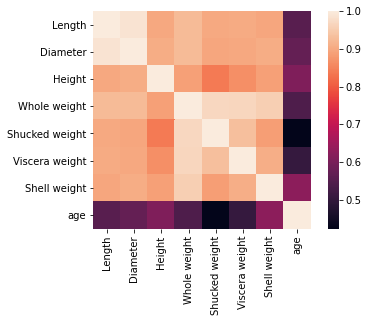

In [23]:
# correlation value with each attribute using heatmap

corr_value=dataset.corr()
sb.heatmap(corr_value,square=True)

## Data Cleaning

No need to apply cleaning to our dataset. Because we don't have any error or empty or null values

In [24]:
# spliting the dataset into input and output attribute.
x=dataset.drop(columns='age')
y=dataset['age']

In [25]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [26]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4165, dtype: float64

## Label Encoder

In [27]:
# Encoding the categorical value into numerical values
labelencoder=LabelEncoder()
x['Sex']=labelencoder.fit_transform(x['Sex'])

## Splitting dataset into training and test set

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=5)

### Classification Modelling

/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LinearRegression : -4.806994 (0.753012)
knn : -5.185138 (1.062242)


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVR : -5.429422 (0.966732)


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


decision_tree : -9.091514 (1.235757)


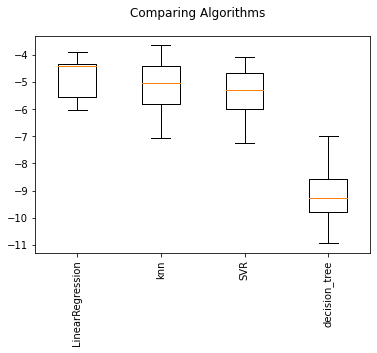

In [29]:
n_neighbors=5
models=[]
models.append(('LinearRegression',LinearRegression()))
models.append(('knn',KNeighborsRegressor(n_neighbors=n_neighbors)))
models.append(('SVR',SVR()))
models.append(("decision_tree",DecisionTreeRegressor()))

#Evaluating Each model
names=[]
predictions=[]
error='neg_mean_squared_error'

for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
axis=fig.add_subplot(111)
plt.boxplot(predictions)
axis.set_xticklabels(names)
plt.xticks(rotation='90')
plt.show()


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LinearRegression : -4.806994 (0.753012)
knn : -5.185138 (1.062242)


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVR : -5.429422 (0.966732)


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


decision_tree : -8.853784 (1.242192)


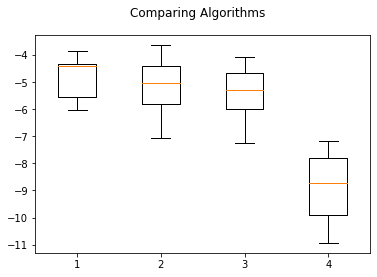

In [30]:
# spot checking and comparing algorithms with minmaxscalar scalar

pipelines=[]
pipelines.append(('scaled LinearRegression',Pipeline([('scaler',MinMaxScaler()),('LinearRegression',LinearRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',MinMaxScaler()),('KNN',KNeighborsRegressor(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVR',Pipeline([('scaler',MinMaxScaler()),('SVR',SVR())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',MinMaxScaler()),('decision',DecisionTreeRegressor())])))

# Evaluating Each model
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

In [31]:
# Linear Regression Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict()
model=LinearRegression()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: -4.806994 using {} 


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [32]:
# KNN Regression Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=MinMaxScaler().fit(x_train)
rescalex=scaler.transform(x_train)
n_neighbors=[3,4,5,6,7,8,9,10,15,20]
# With degree our model fit to training set overfitting so better not use for all algorithms except polyomial
#degree=[1,2,3,4,5,6,7,8,9]
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescalex,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best: -5.090146 using {'n_neighbors': 10} 


We listing tunned two accuracy models

Linear Regression Algorithm Best: -4.857541 using {}

KNN Regression Algorithm Best: -5.125680 using {'n_neighbors': 15}

/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledAB : -7.626621 (0.737305)


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledGBC : -4.741348 (0.973613)


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledRFC : -5.295777 (0.959512)


/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledETC : -5.275918 (0.771535)


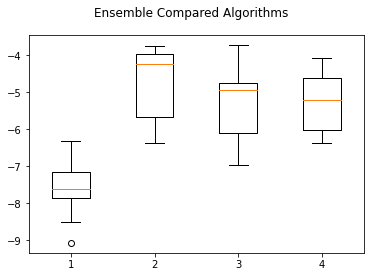

In [33]:
# Ensemble and Boosting algorithm to improve performance

#Ensemble
#Boosting methods

ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',MinMaxScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('scaledGBC',Pipeline([('scale',MinMaxScaler()),('GBc',GradientBoostingRegressor())])))
ensembles.append(('scaledRFC',Pipeline([('scale',MinMaxScaler()),('rf',RandomForestRegressor(n_estimators=10))])))
ensembles.append(('scaledETC',Pipeline([('scale',MinMaxScaler()),('ETC',ExtraTreesRegressor(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()

We listing tunned two accuracy models

Gradient Boosting Algorithm with mean -4.824129 and std(0.622529)

Random Forest Regressor Algorithm with mean -5.198858 and std(0.586180)

Now we are going to tuning this 2 algorithms

In [34]:
scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[5,10,15,20,25,30,40,50,75,100]
param_grid=dict(n_estimators=n_estimators)
model=RandomForestRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best: -4.773680 using {'n_estimators': 75} 


In [35]:
# Gradient Boosting Algorithm Tuning

scaler=MinMaxScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_estimators=[10,15,20,25,30,40,50,75,100,150,200]
param_grid=dict(learning_rate=learning_rate,n_estimators=n_estimators)
model=GradientBoostingRegressor()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/home/nik/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best: -4.729729 using {'learning_rate': 0.1, 'n_estimators': 100} 


We listing top four tunned algorithms.

Linear Regression Algorithm Best: -4.857541 using {}
Regression Algorithm Best: -5.125680 using {'n_neighbors': 15}
Random Forest Regressor Algorithm Best: -4.797185 using {'n_estimators': 75}
Gradient Boosting Regressor Algorithm -4.802066 using {'learning_rate': 0.2, 'n_estimators': 75}
As per above four tunned algorithm Decision Tree Classifier Algorithm.

In [36]:
# Finalize Model
# we finalized the Random Forest Regressor algorithm and evaluate the model for Abalone Physical meansurements

scaler=MinMaxScaler().fit(x_train)
scaler_x=scaler.transform(x_train)
model=RandomForestRegressor(n_estimators=75)
model.fit(scaler_x,y_train)

#Transform the validation test set data
scaledx_test=scaler.transform(x_test)
y_pred=model.predict(scaledx_test)

accuracy=mean_squared_error(y_test,y_pred)

print("accuracy :",accuracy)

accuracy : 4.866344533333334


We got Regression accuracy

training set accuracy: 4.797185

testing accuracy :4.622583966920101